                        Project done by Michela Pirozzi MAT:732531 and Sara Ferioli MAT:733105

# LAB 3

## Goal

* Date le feature del dataset,  qualè la combinazione migliore che permette di avere un nuovo contratto (Es. INDETERMINATO) prima del covid? la combinazione di feature è la stessa anche dopo il covid?
* predirre numero di contratti

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import preprocessing
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
join2 = pd.read_csv('file_name.csv')
join2 = join2.drop(columns='Unnamed: 0')

In [3]:
join2.loc[join2['CONTRATTO'].str.match(r'.*INDETERMINATO.*') == True,"CONTRATTO"]="INDETERMINATO"
join2.loc[join2['CONTRATTO'].str.match(r'.*INDETERMINATO.*') == False,"CONTRATTO"]="NON INDETERMINATO"

# Create mapper
scale_mapper = {'NON INDETERMINATO':0, 'INDETERMINATO':1}

# Map feature values to scale
indeterminato=join2
indeterminato['contratto_transformed'] = indeterminato['CONTRATTO'].replace(scale_mapper)
indeterminato

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,contratto_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,0
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,0
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0


### Label Encoder

In [4]:
# Starting the procedure to encode the data
titolostudio = indeterminato.TITOLOSTUDIO.tolist()
modlavoro = indeterminato.MODALITALAVORO.tolist()
prov = indeterminato.PROVINCIAIMPRESA.tolist()
nazionalita = indeterminato.ITALIANO.tolist()
copia = indeterminato.copy()

In [5]:
# Instantiate labelencoder object for each column that we want to encode
le_titolostudio = LabelEncoder()
le_modlavoro = LabelEncoder()
le_prov = LabelEncoder()
le_nazionalita = LabelEncoder()

In [6]:
# Apply the label encoder to the dataset
le_titolostudio.fit(copia['TITOLOSTUDIO'])
le_modlavoro.fit(copia['MODALITALAVORO'])
le_prov.fit(copia['PROVINCIAIMPRESA'])
le_nazionalita.fit(copia['ITALIANO'])

LabelEncoder()

In [7]:
# Transform into integers
transformation_ts = le_titolostudio.transform(indeterminato['TITOLOSTUDIO']) 
transformation_ts

array([8, 8, 8, ..., 8, 0, 0])

In [8]:
# Try to invert a transformation using the object
list(le_titolostudio.inverse_transform([8]))

['NESSUN TITOLO DI STUDIO']

In [9]:
# Transform into integers
transformation_ml = le_modlavoro.transform(indeterminato['MODALITALAVORO']) 
transformation_prov = le_prov.transform(indeterminato['PROVINCIAIMPRESA']) 
transformation_nazion = le_nazionalita.transform(indeterminato['ITALIANO']) 

In [10]:
# Apply label encoder on categorical feature columns
copia['titolostudio_transformed'] = list(transformation_ts)
copia['modalitalavoro_transformed'] = list(transformation_ml)
copia['provincia_transformed'] = list(transformation_prov)
copia['nazionalita_transformed'] = list(transformation_nazion)
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,contratto_transformed,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,0,188
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,2,0,81
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,0,89
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,4,188
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,2,4,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,0,5,0,89
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,0,8,4,1,89
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,0,8,4,7,89
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,0,5,0,89


### Encoding Manually Ordinal Categorical Features

In [11]:
# Function to retrive the original data from the trasformed ones
# syntax:
# value: trasfomed value
# return 'M' if value is 0 otherwise 'F'
def gender(value):
    if value=='0':
        return 'M'
    else:
        return 'F'

In [12]:
# Create mapper
scale_mapper = {'M':0, 'F':1}

# Map feature values to scale
copia['genere_transformed'] = copia['GENERE'].replace(scale_mapper)
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,contratto_transformed,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,0,188,1
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,2,0,81,1
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,0,89,1
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,4,188,1
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,2,4,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,0,5,0,89,0
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,0,8,4,1,89,0
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,0,8,4,7,89,0
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,0,5,0,89,0


In [13]:
# Trasform the column in int type
copia['Codice_ateco']=copia.Codice_ateco.astype(int)

# We remove the outliers. 
copia = copia[copia['ETA']>=15]
copia = copia[copia['ETA']<100]
copia = copia[copia['anno']<2022]
copia = copia[copia['anno']>2006]
copia

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,anno,mese-anno,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,contratto_transformed,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,F,60,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,UCRAINA,2020,2020-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,0,188,1
1,F,33,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,2012-07,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,2,0,81,1
2,F,45,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,2019-04,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,0,89,1
3,F,61,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,LECCO,UCRAINA,2014,2014-09,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,4,4,188,1
4,F,20,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,2014-05,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,0,8,2,4,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329690,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-07,12,INDUSTRIA DEL TABACCO,0,0,5,0,89,0
9329691,M,35,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,2011-07,12,INDUSTRIA DEL TABACCO,0,8,4,1,89,0
9329692,M,27,NESSUN TITOLO DI STUDIO,NON INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,2009-04,12,INDUSTRIA DEL TABACCO,0,8,4,7,89,0
9329693,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON INDETERMINATO,NaN,BERGAMO,ITALIA,2012,2012-06,12,INDUSTRIA DEL TABACCO,0,0,5,0,89,0


In [14]:
# Drop the columns that have been transformed
transformed_indet = copia.drop(labels =['GENERE', 'TITOLOSTUDIO', 'MODALITALAVORO', 'PROVINCIAIMPRESA', 'ITALIANO', 'SETTOREECONOMICODETTAGLIO_y', 'CONTRATTO'], axis=1)
transformed_indet

,ETA,anno,mese-anno,Codice_ateco,contratto_transformed,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,60,2020,2020-05,97,0,8,4,0,188,1
1,33,2012,2012-07,97,0,8,2,0,81,1
2,45,2019,2019-04,97,0,8,4,0,89,1
3,61,2014,2014-09,97,0,8,4,4,188,1
4,20,2014,2014-05,97,0,8,2,4,89,1
...,...,...,...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,12,0,0,5,0,89,0
9329691,35,2011,2011-07,12,0,8,4,1,89,0
9329692,27,2009,2009-04,12,0,8,4,7,89,0
9329693,37,2012,2012-06,12,0,0,5,0,89,0


In [15]:
# Change the type of all column
transformed_indet['Codice_ateco'] = transformed_indet['Codice_ateco'].astype(str).astype(int)
transformed_indet.dtypes

ETA                            int64
anno                           int64
mese-anno                     object
Codice_ateco                   int64
contratto_transformed          int64
titolostudio_transformed       int64
modalitalavoro_transformed     int64
provincia_transformed          int64
nazionalita_transformed        int64
genere_transformed             int64
dtype: object

In [16]:
transformed_indet

,ETA,anno,mese-anno,Codice_ateco,contratto_transformed,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,60,2020,2020-05,97,0,8,4,0,188,1
1,33,2012,2012-07,97,0,8,2,0,81,1
2,45,2019,2019-04,97,0,8,4,0,89,1
3,61,2014,2014-09,97,0,8,4,4,188,1
4,20,2014,2014-05,97,0,8,2,4,89,1
...,...,...,...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,12,0,0,5,0,89,0
9329691,35,2011,2011-07,12,0,8,4,1,89,0
9329692,27,2009,2009-04,12,0,8,4,7,89,0
9329693,37,2012,2012-06,12,0,0,5,0,89,0


In [17]:
# Function to transform the columns ETA, nazionalita_transformed, genere_transformed in a unique column
# with the format: "ETA - nazionalita_transformed - genere_transformed"
# syntax:
# df: Dataframe
# column: column name of the new column
def trasformed_input(df,column):
    df[column] = df["Codice_ateco"].apply(str) + " - " + df["titolostudio_transformed"].apply(str)+ " - " + df["modalitalavoro_transformed"].apply(str)+ " - " + df["provincia_transformed"].apply(str)
    return df.drop(labels=['Codice_ateco','titolostudio_transformed','modalitalavoro_transformed','provincia_transformed'], axis=1)

In [18]:
# Function to retrive the original data from the trasformed ones
# syntax:
# df: Dataframe
# column: column name of the trasformed column
def inverse_trasformed_input(df,column):
    if type(df) is str:
        codice_ateco,titolostudio,modalitalavoro,provincia=df.split(" - ")
        print("Codice_ateco: "+codice_ateco+" titolostudio: "+titolostudio+" modalitalavoro: "+modalitalavoro+" provincia: "+provincia)
        return codice_ateco,titolostudio,modalitalavoro,provincia
    
    df[['Codice_ateco','titolostudio_transformed','modalitalavoro_transformed','provincia_transformed']] = df[column].str.split(" - ",expand=True,)
    return df.drop(labels =[column], axis=1)

In [19]:
# Encoding of the input
transformed_indet=trasformed_input(transformed_indet,'Output')
transformed_indet

,ETA,anno,mese-anno,contratto_transformed,nazionalita_transformed,genere_transformed,Output
0,60,2020,2020-05,0,188,1,97 - 8 - 4 - 0
1,33,2012,2012-07,0,81,1,97 - 8 - 2 - 0
2,45,2019,2019-04,0,89,1,97 - 8 - 4 - 0
3,61,2014,2014-09,0,188,1,97 - 8 - 4 - 4
4,20,2014,2014-05,0,89,1,97 - 8 - 2 - 4
...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,0,89,0,12 - 0 - 5 - 0
9329691,35,2011,2011-07,0,89,0,12 - 8 - 4 - 1
9329692,27,2009,2009-04,0,89,0,12 - 8 - 4 - 7
9329693,37,2012,2012-06,0,89,0,12 - 0 - 5 - 0


In [20]:
# With LabelEncoder we encode the input column
copia = transformed_indet.copy()
le_output = LabelEncoder()
le_output.fit(copia['Output'])
transformation_output = le_output.transform(transformed_indet['Output']) 
copia['Output_transformed'] = list(transformation_output)
copia=copia.drop(labels =['Output'], axis=1)
copia

,ETA,anno,mese-anno,contratto_transformed,nazionalita_transformed,genere_transformed,Output_transformed
0,60,2020,2020-05,0,188,1,32612
1,33,2012,2012-07,0,81,1,32591
2,45,2019,2019-04,0,89,1,32612
3,61,2014,2014-09,0,188,1,32618
4,20,2014,2014-05,0,89,1,32597
...,...,...,...,...,...,...,...
9329690,36,2012,2012-07,0,89,0,1349
9329691,35,2011,2011-07,0,89,0,1350
9329692,27,2009,2009-04,0,89,0,1351
9329693,37,2012,2012-06,0,89,0,1349


### Bilanciamento

In [21]:
copia["contratto_transformed"].value_counts(normalize=True)

0    0.854901
1    0.145099
Name: contratto_transformed, dtype: float64

Non è bilanciato

#### Undersampling randomico

Undersampling perchè diamo più importanza all'INDETERMINATO che ha meno occorrenze

In [22]:
copia[copia["contratto_transformed"]==1].count()

ETA                        1351972
anno                       1351972
mese-anno                  1351972
contratto_transformed      1351972
nazionalita_transformed    1351972
genere_transformed         1351972
Output_transformed         1351972
dtype: int64

In [23]:
copia[copia["contratto_transformed"]==0].count()

ETA                        7965631
anno                       7965631
mese-anno                  7965631
contratto_transformed      7965631
nazionalita_transformed    7965631
genere_transformed         7965631
Output_transformed         7965631
dtype: int64

In [24]:
data_0 = copia[copia["contratto_transformed"]==0].sample(n=1351972,random_state=16) 
data_1 = copia[copia["contratto_transformed"]==1]
balanced = data_0.append(data_1)
balanced

,ETA,anno,mese-anno,contratto_transformed,nazionalita_transformed,genere_transformed,Output_transformed
4956398,25,2014,2014-11,0,89,1,13966
3997191,46,2011,2011-12,0,89,0,13797
3184721,24,2016,2016-01,0,144,0,6674
6627125,38,2020,2020-07,0,89,1,26059
2405463,32,2012,2012-05,0,89,1,26698
...,...,...,...,...,...,...,...
9329673,26,2019,2019-02,1,89,1,18030
9329675,28,2014,2014-09,1,89,1,18031
9329683,33,2009,2009-01,1,89,0,18036
9329685,34,2021,2021-08,1,89,0,18031


In [25]:
balanced["contratto_transformed"].value_counts(normalize=True)

0    0.5
1    0.5
Name: contratto_transformed, dtype: float64

### ARIMA

In [26]:
balanced
bal1 = balanced.copy()
bal1 = bal1.reset_index(drop=True)
bal1

,ETA,anno,mese-anno,contratto_transformed,nazionalita_transformed,genere_transformed,Output_transformed
0,25,2014,2014-11,0,89,1,13966
1,46,2011,2011-12,0,89,0,13797
2,24,2016,2016-01,0,144,0,6674
3,38,2020,2020-07,0,89,1,26059
4,32,2012,2012-05,0,89,1,26698
...,...,...,...,...,...,...,...
2703939,26,2019,2019-02,1,89,1,18030
2703940,28,2014,2014-09,1,89,1,18031
2703941,33,2009,2009-01,1,89,0,18036
2703942,34,2021,2021-08,1,89,0,18031


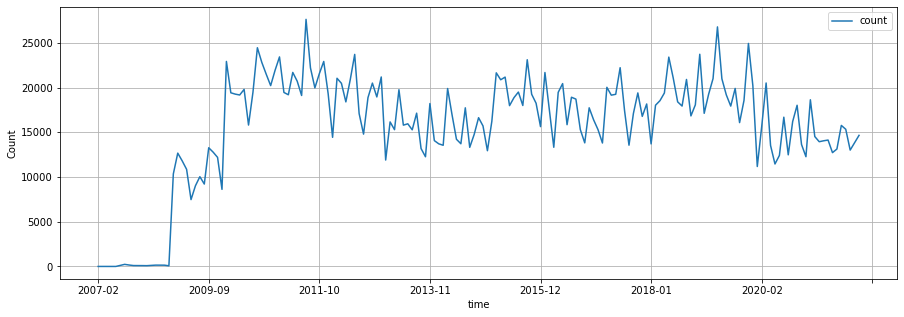

In [43]:
bal2 = bal1.groupby("mese-anno").size().reset_index(name='count')
bal2 = bal2.set_index('mese-anno')
f, ax1 = plt.subplots(1,1,figsize=(15,5))
bal2.plot(ax=ax1)
ax1.set_xlabel("time")
ax1.set_ylabel("Count")
plt.grid(True)

In [45]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(bal2['count'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

TypeError: float() argument must be a string or a number, not 'method'

In [32]:
bal2

,0
mese-anno,
2007-02,2
2007-04,1
2007-06,1
2007-10,1
2007-11,1
...,...
2021-08,15770
2021-09,15336
2021-10,13012


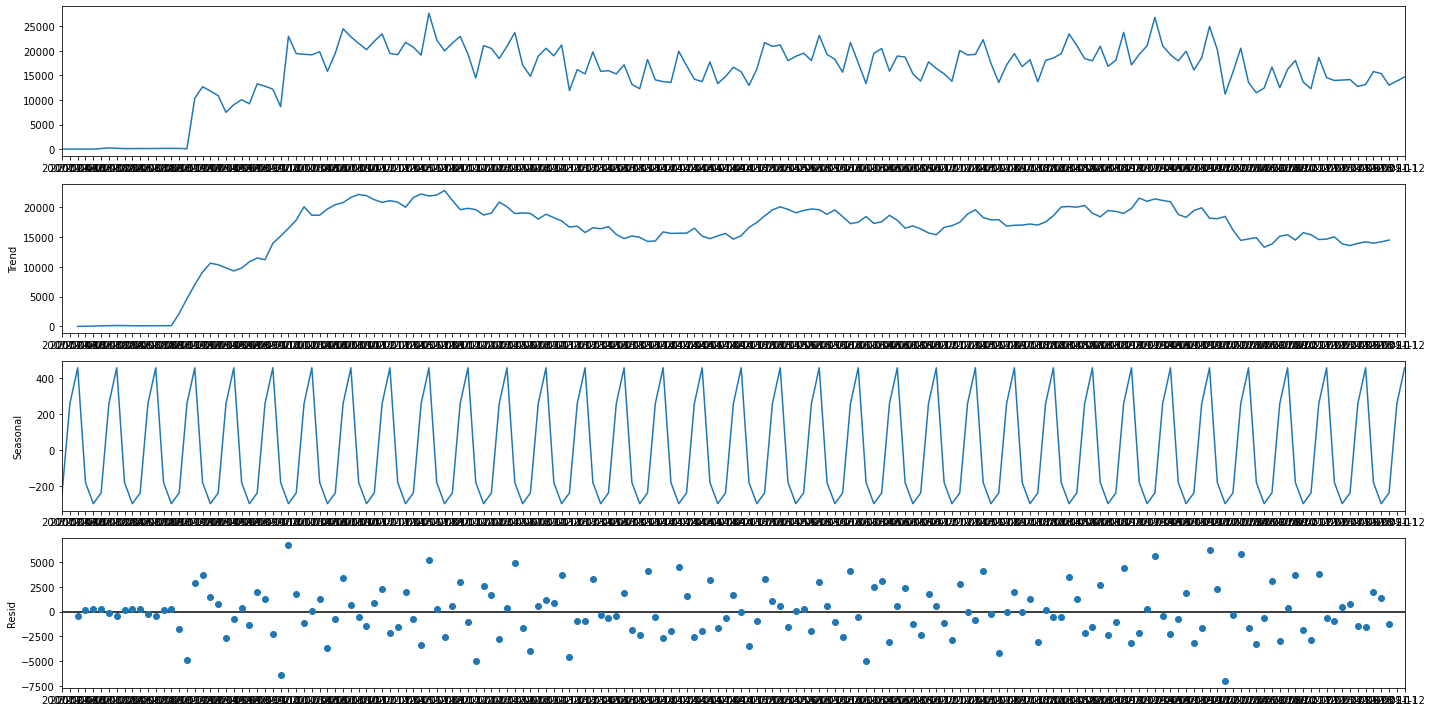

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = 20, 10
# Additive decomposition
decomposed_add = seasonal_decompose(bal2, model="additive", period=5)
add = decomposed_add.plot()
plt.show()

In [47]:
bal_diff = bal2.diff().dropna()
plt.figure(figsize=(12,5))
ax1 = bal_diff.plot()
ax1.set_xlabel("Anno")
ax1.set_ylabel("diff")
plt.grid(True)
plt.show()

KeyError: 0

<Figure size 864x360 with 0 Axes>

In [35]:
results = adfuller(bal_diff)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -2.966888
p-value: 0.038105


In [36]:
results = adfuller(bal2.diff().diff().dropna()[0])
print('ADF Statistic: %f' % results[0])
print("P-value of a test is: {}".format(results[1]))

ADF Statistic: -7.803319
P-value of a test is: 7.393489604570504e-12


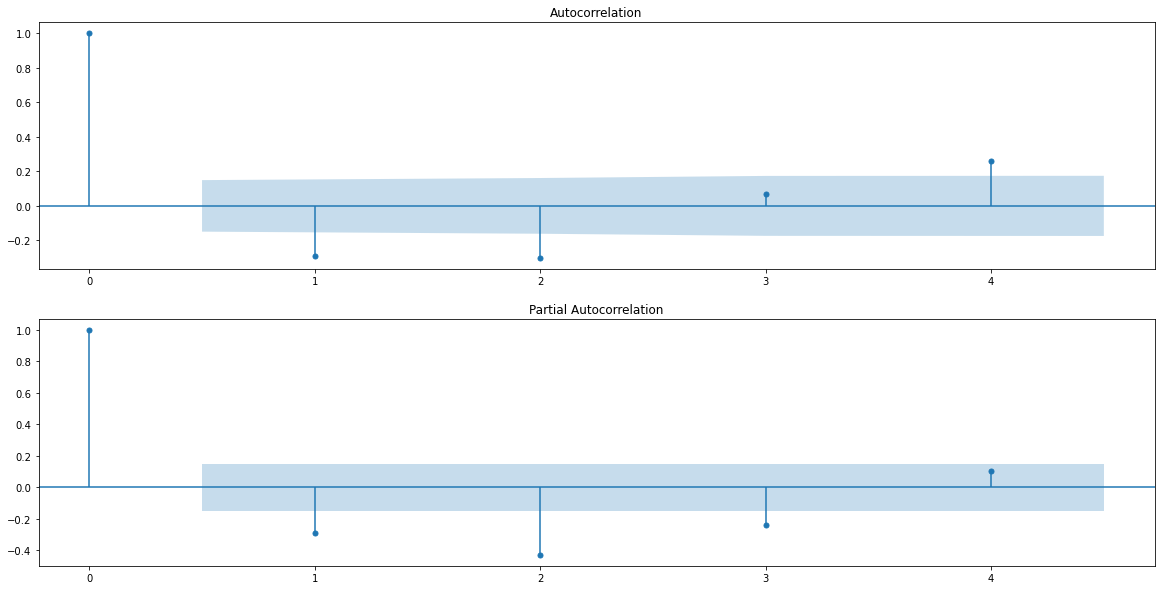

In [48]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,ax = plt.subplots(2,1,figsize=(20,10))
plot_acf(bal_diff, lags=4, ax=ax[0])
plot_pacf(bal_diff, lags=4, ax=ax[1])
plt.show()

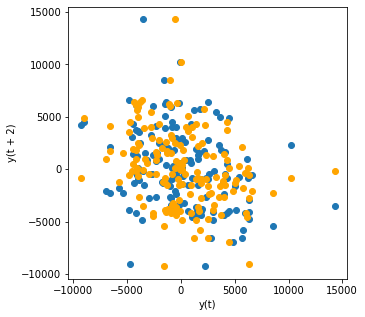

In [49]:
from pandas.plotting import lag_plot

fig, ax = plt.subplots(figsize=(5, 5))
ax = lag_plot(bal_diff, lag=1)
ax = lag_plot(bal_diff, lag=2, c="orange")

plt.show()

In [50]:
bal2

,count
mese-anno,
2007-02,2
2007-04,1
2007-06,1
2007-10,1
2007-11,1
...,...
2021-08,15770
2021-09,15336
2021-10,13012


CONTROLLARE I VALORI DI P E Q CHE DEVONO ESSERE IN CORRISPONDENZA
DEL VALORE DI ADFULLER FATTO SOPRA!!!

In [51]:
from statsmodels.tsa.arima.model import ARIMA

arima_df = pd.DataFrame(columns=["p","q","aic","bic"])

i=0
# Loop over p values from 0-3
for p in range(4):
    # Loop over q values from 0-3
    for q in range(4):
        
        try:
            # creating and fitting ARIMA(p,1,q) model
            model = ARIMA(bal2['count'].astype(float), order=(p,1,q))
            results = model.fit()
            
            # Printing order, AIC and BIC
            #print(p, q, results.aic, results.bic)
            arima_df.loc[i,"p"] = p
            arima_df.loc[i,"q"] = q
            arima_df.loc[i,"aic"] = results.aic
            arima_df.loc[i,"bic"] = results.bic
            i = i+1
        except:
            #print(p, q, None, None)
            i = i+1
    
arima_df["sum_aic_bic"] = arima_df["aic"]+arima_df["bic"]
arima_df.sort_values(by="aic", ascending=False, inplace=True)
arima_df

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model

,p,q,aic,bic,sum_aic_bic
0,0,0,3299.191196,3302.33869,6601.529886
4,1,0,3286.068245,3292.363233,6578.431478
1,0,1,3258.16433,3264.459319,6522.62365
5,1,1,3258.022115,3267.464598,6525.486713
11,2,3,3256.760406,3275.645373,6532.405779
6,1,2,3256.674577,3269.264555,6525.939133
2,0,2,3256.646137,3266.088621,6522.734758
3,0,3,3255.394903,3267.984881,6523.379783
8,2,0,3254.577296,3264.01978,6518.597076
10,2,2,3251.502485,3267.239958,6518.742443


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2 = SARIMAX(bal2, order=(2,1,1), seasonal_order=(0,1,0,6))
results = model2.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35351D+00    |proj g|=  4.62874D-02

At iterate    5    f=  9.34613D+00    |proj g|=  1.03059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.253D-06   9.346D+00
  F =   9.3460245327993778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                  173
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 6)   Log Likelihood               -1616.862
Date:                            Tue, 17 May 2022   AIC                           3241.724
Time:                                    17:05:10   BIC                           3254.172
Sample:                                         0   HQIC                          3246.777
                                            - 173                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2722      0.151     -1.807      0.071      -0.567       0.023
ar.L2         -0.4790      0.094     -5.083      0.000      -0.664      -0.294
ma.L1         -0.2461      0.153     -1.613      0.107      -0.545       0.053
sigma2       1.68e+07   1.59e+06     10.588      0.000    1.37e+07    1.99e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.51
Prob(Q):                              0.75   Prob(JB):                         0.10
Heteroskedasticity (H):               0.79   Skew:                             0.09
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


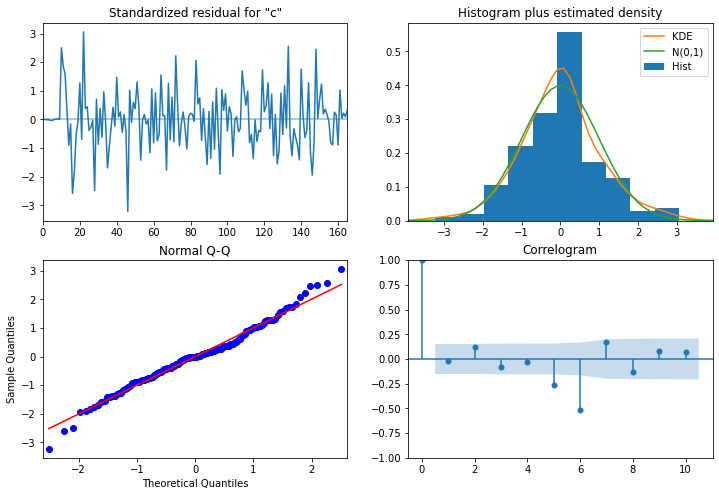

In [53]:
plt.rcParams['figure.figsize'] = 12, 8
plot = results.plot_diagnostics()

In [54]:
bal2

,count
mese-anno,
2007-02,2
2007-04,1
2007-06,1
2007-10,1
2007-11,1
...,...
2021-08,15770
2021-09,15336
2021-10,13012


/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


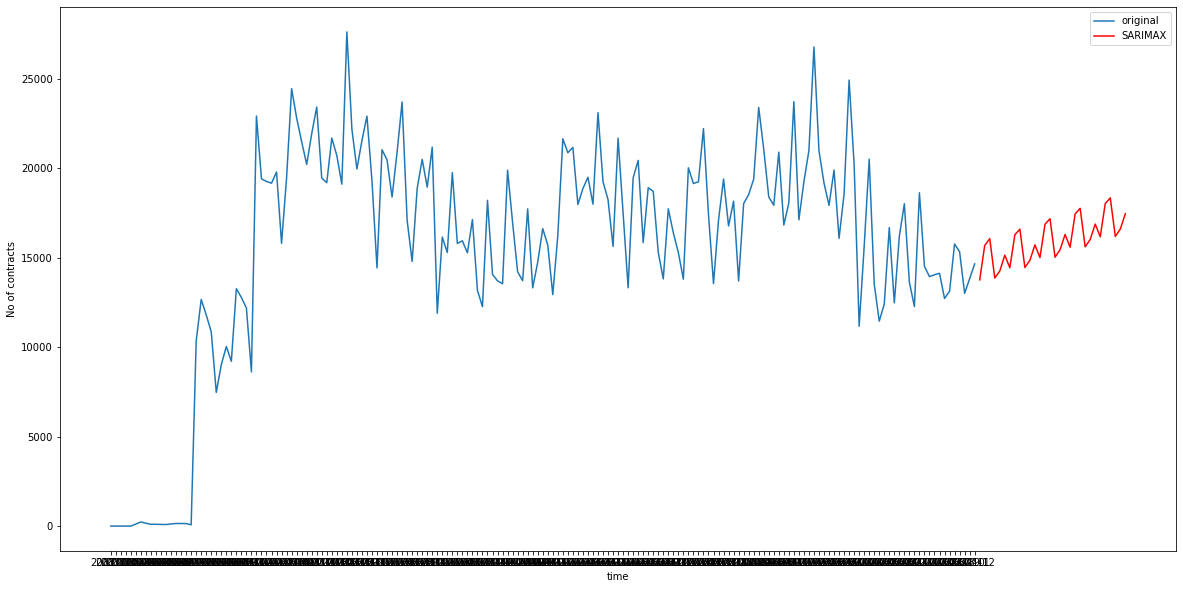

In [58]:
# Create SARIMA mean forecast
forecast = results.get_forecast(steps=30)
lower = forecast.conf_int()["lower count"]
upper = forecast.conf_int()["upper count"]

# Plot mean SARIMA predictions
fig,ax = plt.subplots(1,1,figsize=(20,10))

plt.plot(bal2, label='original')
plt.plot(forecast.predicted_mean, label='SARIMAX', c="r")

plt.xlabel('time')
plt.ylabel('No of contracts')
plt.legend()
plt.show()

In [60]:
from pmdarima.arima import auto_arima

In [61]:
def stationarity_check(ts):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [82]:
def decomposition_plot(ts):
# Apply seasonal_decompose 
    #decomposition = seasonal_decompose(ts.asfreq('MS'))
    decomposition = seasonal_decompose(ts, model="additive", period=5)
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

In [87]:
def plot_acf_pacf(ts, figsize=(10,8),lags=24):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot ts
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

In [68]:
bal2.index = pd.to_datetime(bal2.index)

In [73]:
ts = bal2["count"]
ts.index

DatetimeIndex(['2007-02-01', '2007-04-01', '2007-06-01', '2007-10-01',
               '2007-11-01', '2008-01-01', '2008-02-01', '2008-03-01',
               '2008-04-01', '2008-05-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='mese-anno', length=173, freq=None)

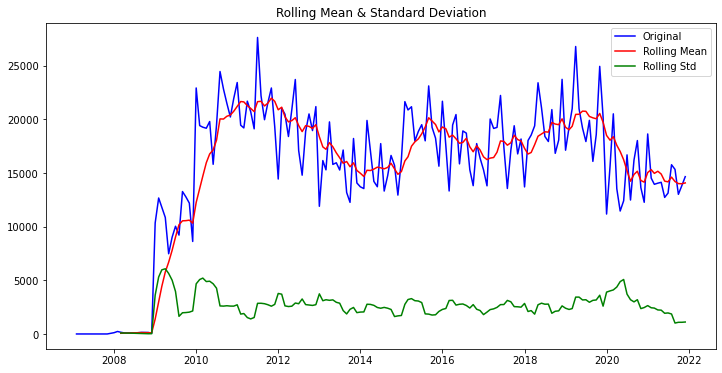


Results of Dickey-Fuller Test: 

Test Statistic                  -4.621934
p-value                          0.000118
#Lags Used                      14.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


In [70]:
stationarity_check(ts)

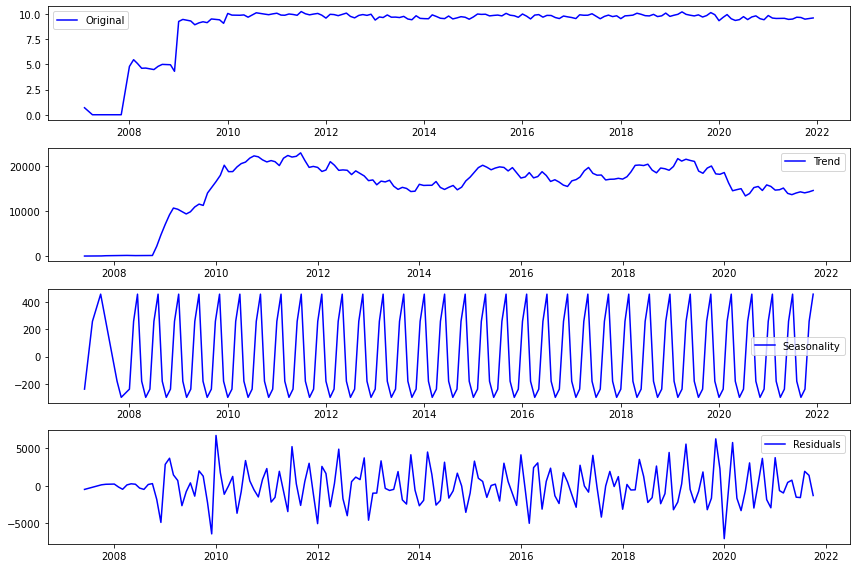

In [84]:
decomposition_plot(ts)

(<Figure size 720x576 with 3 Axes>,
 array([<AxesSubplot:xlabel='mese-anno'>,
        <AxesSubplot:title={'center':'Autocorrelation'}>,
        <AxesSubplot:title={'center':'Partial Autocorrelation'}>],
       dtype=object))

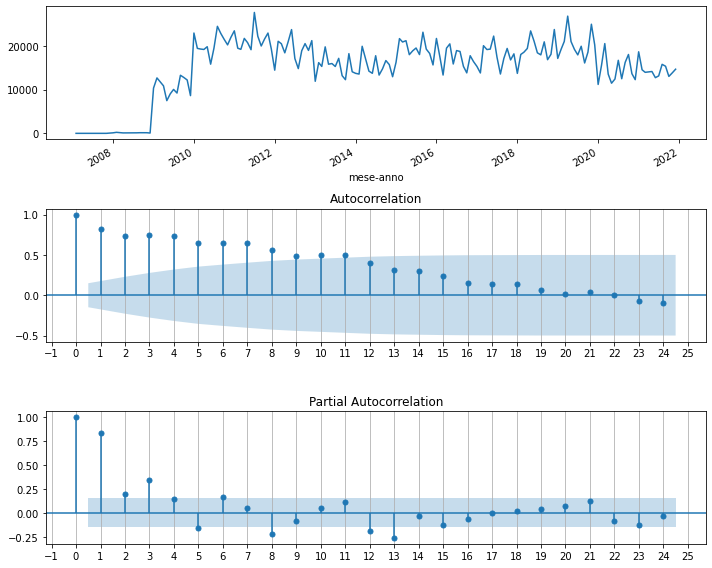

In [88]:
plot_acf_pacf(ts)

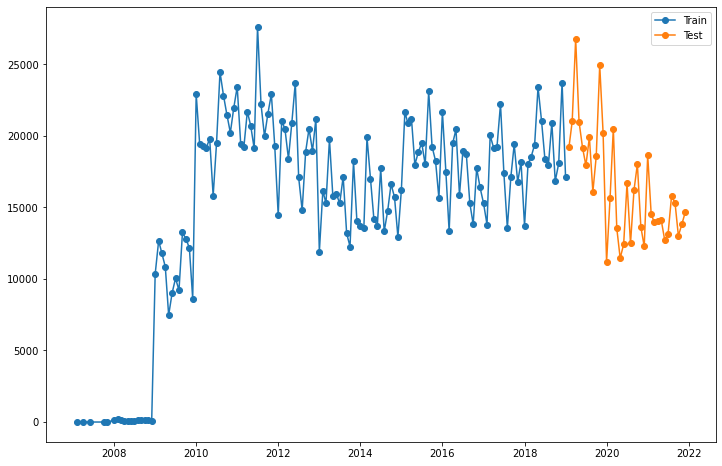

In [89]:
# Define a specific test and train set
# Train Test Split Index
train_size = 0.8
split_idx = round(len(ts)* train_size)
split_idx

# Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [90]:
model = auto_arima(train,
                      start_p=0,
                      start_q=0,
                      information_criterion='aic',
                      test='adf',
                      max_p=4,
                      max_q=4,
                      D=1,
                      start_P=0,
                      m = 12,
                      seasonal=True,
                      trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,
                      verbose=1)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2484.585, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2451.787, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2470.669, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2440.241, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2447.364, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2419.371, Time=0.26 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2428.034, Time=0.09 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=2406.928, Time=0.18 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(2,1,0)(1,1,2)[12]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  138
Model:             SARIMAX(3, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1182.655
Date:                                 Tue, 17 May 2022   AIC                           2383.311
Time:                                         17:23:37   BIC                           2408.766
Sample:                                              0   HQIC                          2393.652
                                                 - 138                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2384      0.348     -0.685      0.493      -0.921       0.444
ar.L2         -0.9344      0.140     -6.697      0.000      -1.208      -0.661
ar.L3          0.1340      0.333      0.402      0.687      -0.518       0.786
ma.L1         -0.3245      0.302     -1.076      0.282      -0.916       0.267
ma.L2          0.6933      0.140      4.968      0.000       0.420       0.967
ma.L3         -0.5732      0.245     -2.343      0.019      -1.053      -0.094
ma.S.L12      -0.5141      0.208     -2.472      0.013      -0.922      -0.106
ma.S.L24      -0.3199      0.142     -2.256      0.024      -0.598      -0.042
sigma2      1.247e+07   1.58e-08    7.9e+14      0.000    1.25e+07    1.25e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                12.02
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.37
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.84e+31. Standard errors may be unstable.
"""

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


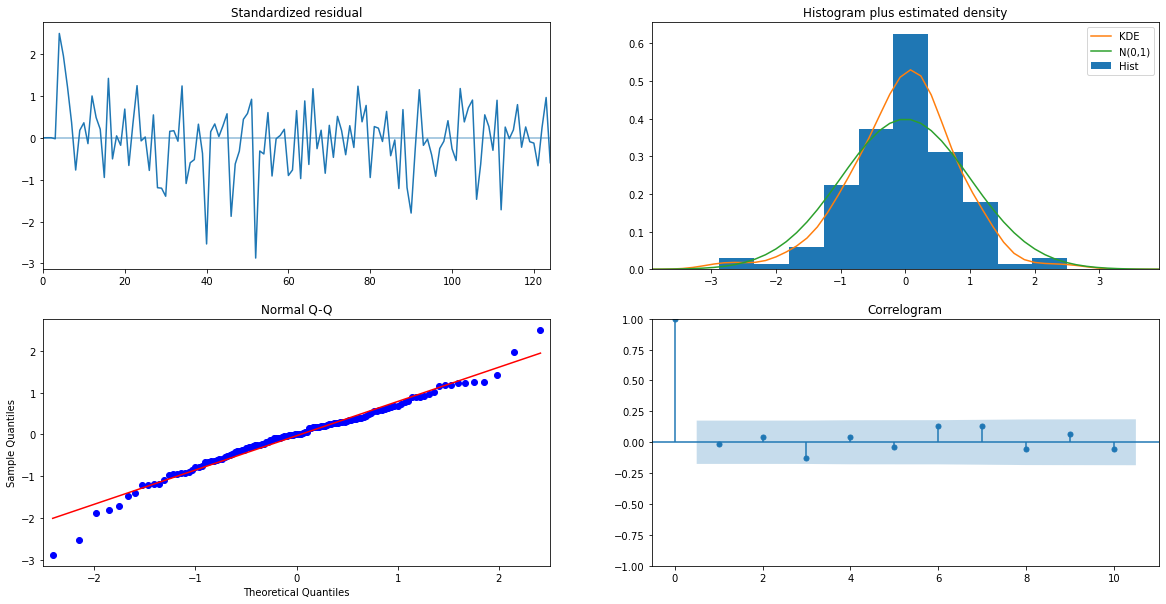

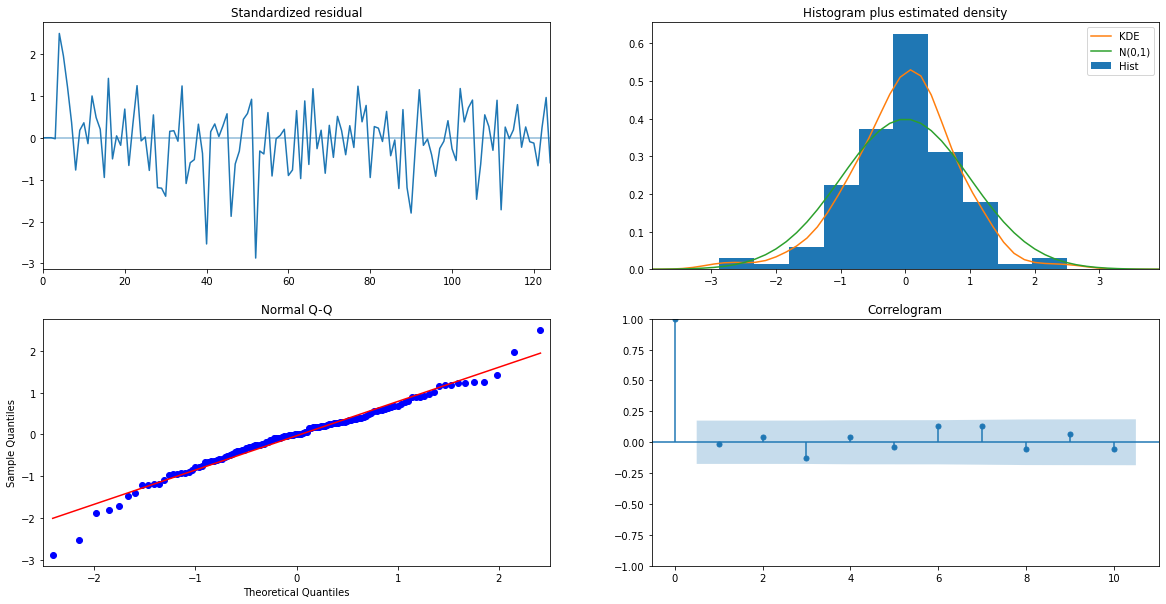

In [91]:
model.plot_diagnostics()

In [92]:
# steps = 12
# pred_mean,pred_conf_int = model.predict(return_conf_int=True, steps=steps)
pred_mean,pred_conf_int = model.predict(return_conf_int=True)
pred_df = pd.DataFrame({'pred':pred_mean, 
                        'lower':pred_conf_int[:,0],
                        'upper':pred_conf_int[:,1]},
                        index= pd.date_range(test.index[0],
                                                  periods=len(pred_mean), freq='M'))
# auto_model.conf_int()
pred_df

,pred,lower,upper
2019-02-28,18293.153309,11338.238553,25248.068064
2019-03-31,20878.607708,13287.917989,28469.297427
2019-04-30,22918.004498,14987.461696,30848.547300
2019-05-31,21320.386199,12813.478626,29827.293772
2019-06-30,19804.274716,10762.768931,28845.780501
2019-07-31,22611.645859,13299.288806,31924.002911
2019-08-31,20659.965518,11005.008818,30314.922218
2019-09-30,19467.017785,9282.097917,29651.937654
2019-10-31,19449.818622,8920.120305,29979.516938
2019-11-30,22229.932966,11472.307574,32987.558358


In [95]:
pred = pred_df['pred'] 
# Calculate Mean Squared Error
print('Mean Squared Error :', mean_squared_error(pred, test[:len(pred)]))

Mean Squared Error : 5841004.219008835


In [96]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 2, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [97]:
# Plotting Predictions
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.96347D+00    |proj g|=  8.73184D-01

At iterate    5    f=  8.82773D+00    |proj g|=  8.92870D-01

At iterate   10    f=  8.76335D+00    |proj g|=  1.92665D-01

At iterate   15    f=  8.74719D+00    |proj g|=  3.07708D-02

At iterate   20    f=  8.74580D+00    |proj g|=  1.46783D-02

At iterate   25    f=  8.74539D+00    |proj g|=  1.76355D-02

At iterate   30    f=  8.74529D+00    |proj g|=  2.88542D-03

At iterate   35    f=  8.74519D+00    |proj g|=  2.55922D-02

At iterate   40    f=  8.74465D+00    |proj g|=  2.33430D-02

At iterate   45    f=  8.74329D+00    |proj g|=  7.39411D-02

At iterate   50    f=  8.74131D+00    |proj g|=  3.39000D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   count   No. Observations:                  173
Model:             SARIMAX(3, 1, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -1512.247
Date:                                 Tue, 17 May 2022   AIC                           3042.494
Time:                                         17:26:17   BIC                           3070.171
Sample:                                              0   HQIC                          3053.733
                                                 - 173                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2427      0.306     -0.794      0.427      -0.842       0.357
ar.L2         -0.9456      0.120     -7.879      0.000      -1.181      -0.710
ar.L3          0.1291      0.296      0.436      0.663      -0.451       0.709
ma.L1         -0.2988      0.256     -1.167      0.243      -0.801       0.203
ma.L2          0.7131      0.115      6.187      0.000       0.487       0.939
ma.L3         -0.6004      0.205     -2.931      0.003      -1.002      -0.199
ma.S.L12      -0.6209      0.139     -4.469      0.000      -0.893      -0.349
ma.S.L24      -0.2098      0.123     -1.709      0.087      -0.450       0.031
sigma2      1.281e+07   1.12e-08   1.14e+15      0.000    1.28e+07    1.28e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.67
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.35
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.4e+31. Standard errors may be unstable.
"""

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


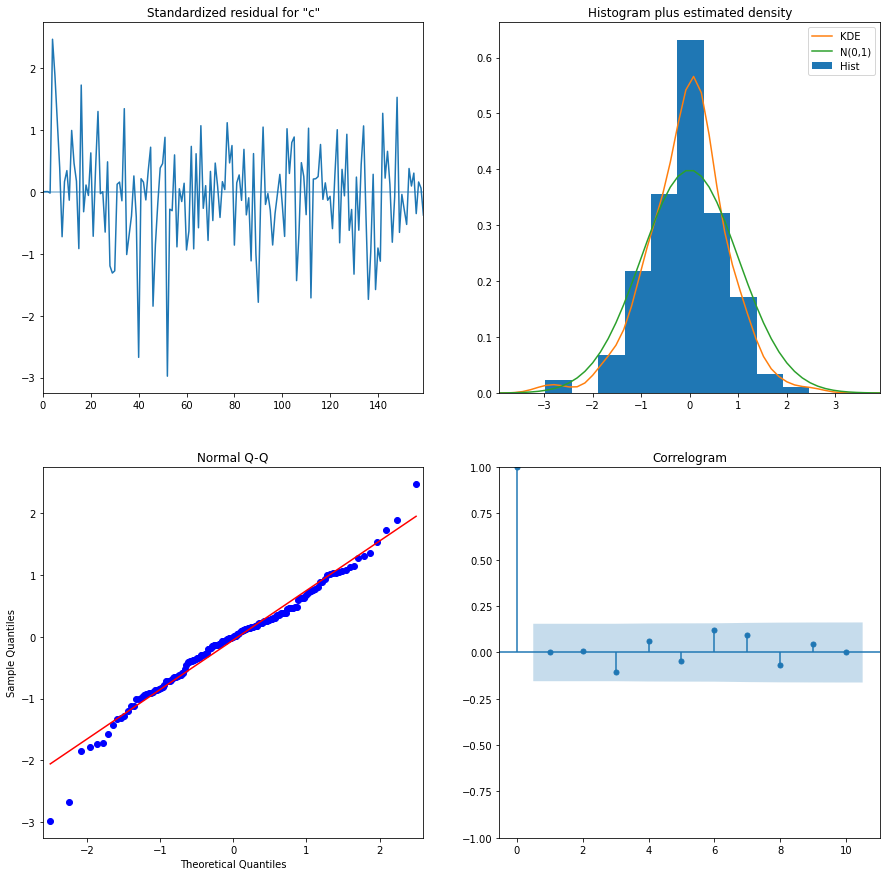

In [98]:
# Validation
# Fit auto_arima model that is trained on training set to test dataset.
best_model = SARIMAX(ts,
                     order=model.order,
                     seasonal_order=model.seasonal_order).fit()
display(best_model.summary())
best_model.plot_diagnostics(figsize=(15,15));

In [99]:
# Plotting Predictions
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

In [ ]:
plot_train_test_pred(train,test,pred_df)

# PARTE DA QUI

In [33]:

#Load ML libraries
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [48]:
balanced = balanced.drop(columns=['Unnamed: 0'])


KeyError: "['Unnamed: 0'] not found in axis"

In [49]:
balanced

,ETA,anno,mese-anno,contratto_transformed,nazionalita_transformed,genere_transformed,Output_transformed
4956398,25,2014,2014-11,0,89,1,13966
3997191,46,2011,2011-12,0,89,0,13797
3184721,24,2016,2016-01,0,144,0,6674
6627125,38,2020,2020-07,0,89,1,26059
2405463,32,2012,2012-05,0,89,1,26698
...,...,...,...,...,...,...,...
9329673,26,2019,2019-02,1,89,1,18030
9329675,28,2014,2014-09,1,89,1,18031
9329683,33,2009,2009-01,1,89,0,18036
9329685,34,2021,2021-08,1,89,0,18031


In [53]:
bal2 = balanced.groupby("mese-anno").size().reset_index(name='count')
bal3 = bal2.set_index('mese-anno')
bal2

,mese-anno,count
0,2007-02,2
1,2007-04,1
2,2007-06,1
3,2007-10,1
4,2007-11,1
...,...,...
168,2021-08,15770
169,2021-09,15336
170,2021-10,13012
171,2021-11,13829


In [54]:
# Lag features and Shift index
for i in range(1,3):
    lag_i = 'lag_' + str(i)
    bal2[lag_i] = bal2['count'].shift(i)
    
# Rolling window
bal2['rolling_mean'] = bal2['count'].rolling(window=2).mean()
bal2['rolling_max'] = bal2['count'].rolling(window=2).max()
bal2['rolling_min'] = bal2['count'].rolling(window=2).min()

<AxesSubplot:>

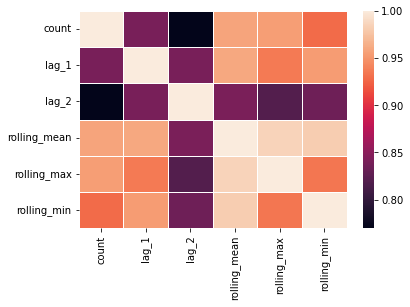

In [55]:
corr = bal2.corr()
fig = plt.figure(figsize=(6,4))
sns.heatmap(corr, linewidths=.5)

In [57]:
bal2 = bal2[["mese-anno", "rolling_mean","rolling_max", "rolling_min", "count"]]
print('Shape:', bal2.shape)
bal2.head()

Shape: (173, 5)


,mese-anno,rolling_mean,rolling_max,rolling_min,count
0,2007-02,NaN,NaN,NaN,2
1,2007-04,1.5,2.0,1.0,1
2,2007-06,1.0,1.0,1.0,1
3,2007-10,1.0,1.0,1.0,1
4,2007-11,1.0,1.0,1.0,1


In [58]:
bal2.fillna(bal2.mean(), inplace = True)
bal2.head()

,mese-anno,rolling_mean,rolling_max,rolling_min,count
0,2007-02,15677.985465,16997.05814,14358.912791,2
1,2007-04,1.500000,2.00000,1.000000,1
2,2007-06,1.000000,1.00000,1.000000,1
3,2007-10,1.000000,1.00000,1.000000,1
4,2007-11,1.000000,1.00000,1.000000,1


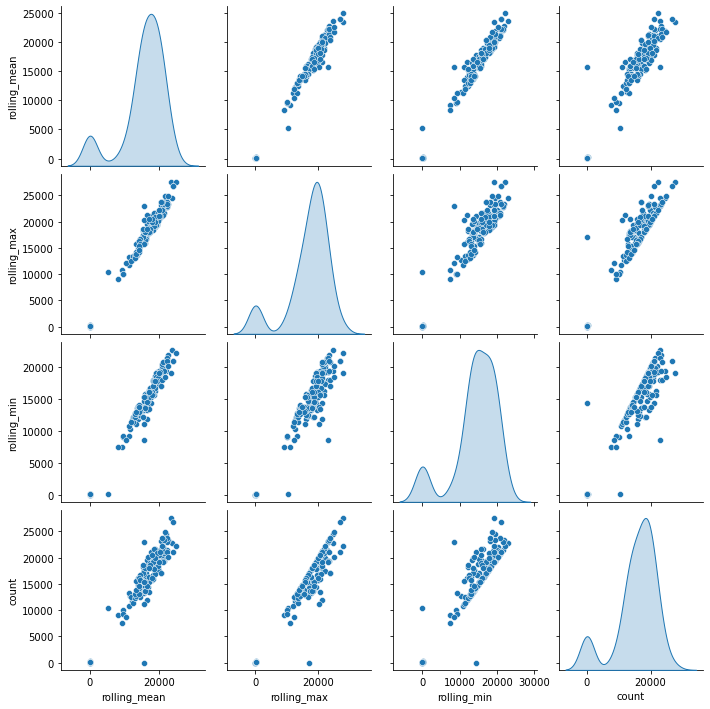

In [59]:
sns.pairplot(bal2, diag_kind = 'kde')

In [60]:
bal2.shape

(173, 5)

In [61]:
# Split the time series data (Train-78, Test-20)
#retail_data = retail_data.set_index('StartDate')
print('Total records in dataset:', len(bal2))
retail_train = bal2.iloc[0:138]               
retail_test = bal2.iloc[138:]

retail_pred_train = bal2.iloc[0:138]               
retail_pred_test = bal2.iloc[180:]
print('Total records in Training set:', len(retail_train))
print('Total records in Test set:', len(retail_test))

Total records in dataset: 173
Total records in Training set: 138
Total records in Test set: 35


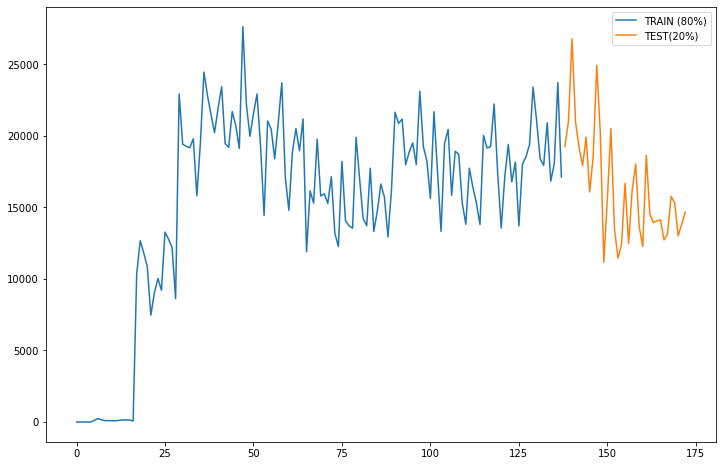

In [63]:
retail_train['count'].plot(legend=True,label='TRAIN (80%)')
retail_test['count'].plot(legend=True,label='TEST(20%)',figsize=(12,8));

In [64]:
X_train = retail_train.drop(['count'], axis=1)
y_train = retail_train['count'].values

X_test = retail_test.drop(['count'], axis=1)
y_test = retail_test['count'].values

In [65]:
X_pred_train = retail_pred_train.drop(['count'], axis=1)
y_pred_train = retail_pred_train['count'].values

X_pred_test = retail_pred_test.drop(['count'], axis=1)
y_pred_test = retail_pred_test['count'].values

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

In [95]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
ses_model = SimpleExpSmoothing(retail_train['count']).fit(smoothing_level=0.3)
ses_preds = ses_model.forecast(steps = 35) 

In [111]:
ses_errors_df = retail_test[['count']]
ses_errors_df['Predicted_Base'] = ses_preds
ses_errors_df['Error'] = ses_preds - y_test
ses_errors_df.insert(0, 'Modelname', 'Holtman- SES')

In [108]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(retail_train['count'],trend='add').fit()
doublemodel_preds = double_model.forecast(35).rename('DES Forecast')

In [100]:
des_errors_df = retail_test[['count']]
des_errors_df['Predicted_Base'] = doublemodel_preds
des_errors_df['Error'] = doublemodel_preds - y_test
des_errors_df.insert(0, 'Modelname', 'Holtman- DES')
des_errors_df.head()

,Modelname,count,Predicted_Base,Error
138,Holtman- DES,19251,19159.442499,-91.557501
139,Holtman- DES,21004,19160.351139,-1843.648861
140,Holtman- DES,26785,19161.259778,-7623.740222
141,Holtman- DES,20982,19162.168418,-1819.831582
142,Holtman- DES,19182,19163.077058,-18.922942


In [101]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(retail_train['count'],trend='add', seasonal= 'mul',seasonal_periods= 12).fit(use_boxcox=False, remove_bias=False)
tes_forecast = triple_model.forecast(35).rename('TES_Forecast')

In [113]:
tes_errors_df = retail_test[['count']]
tes_errors_df['Predicted_Base'] = tes_forecast
tes_errors_df['Error'] = tes_forecast - y_test
tes_errors_df.insert(0, 'Modelname', 'Holtman- TES')
tes_errors_df.head()

,Modelname,count,Predicted_Base,Error
138,Holtman- TES,19251,17721.917012,-1529.082988
139,Holtman- TES,21004,19214.253680,-1789.746320
140,Holtman- TES,26785,20064.475852,-6720.524148
141,Holtman- TES,20982,22827.322927,1845.322927
142,Holtman- TES,19182,21549.899886,2367.899886


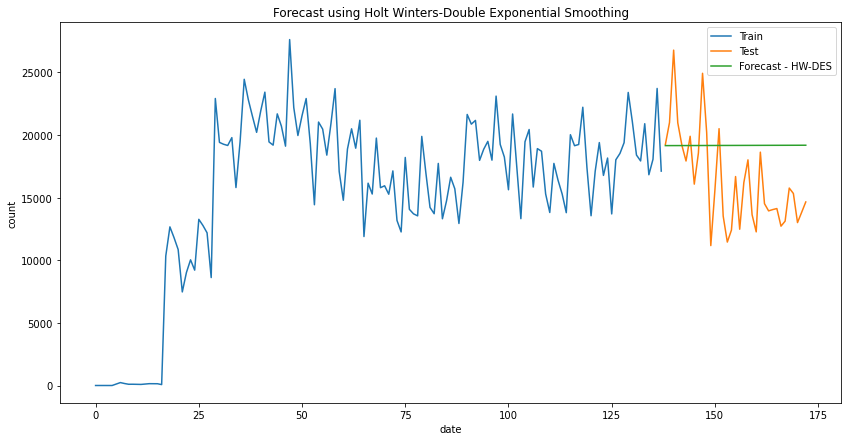

In [114]:
fig = plt.figure(figsize=(14,7))
plt.plot(retail_train.index, retail_train['count'], label='Train')
plt.plot(retail_test.index, retail_test['count'], label='Test')
plt.plot(des_errors_df.index, des_errors_df['Predicted_Base'], label='Forecast - HW-DES')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('count')
plt.title('Forecast using Holt Winters-Double Exponential Smoothing')
plt.show()

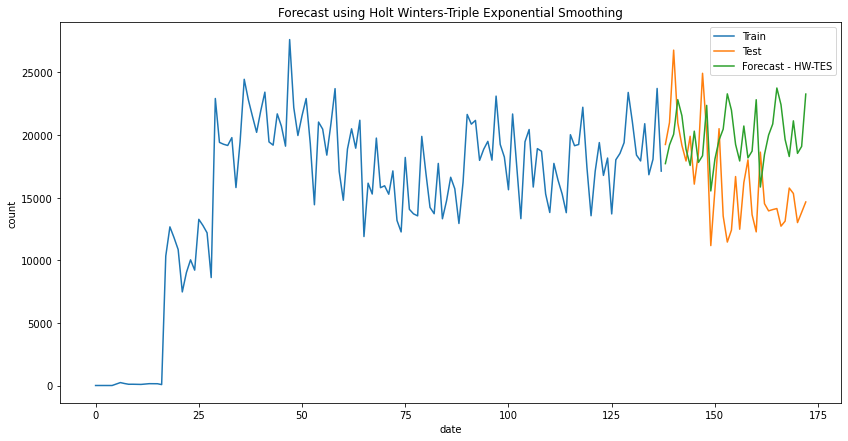

In [115]:
fig = plt.figure(figsize=(14,7))
plt.plot(retail_train.index, retail_train['count'], label='Train')
plt.plot(retail_test.index, retail_test['count'], label='Test')
plt.plot(tes_errors_df.index, tes_errors_df['Predicted_Base'], label='Forecast - HW-TES')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('count')
plt.title('Forecast using Holt Winters-Triple Exponential Smoothing')
plt.show()

In [116]:
def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, sales=tes_errors_df['count']):
    return np.sum(np.abs(err))/np.sum(sales) * 100

In [127]:
X_train = X_train.drop(columns='mese-anno')
X_test = X_test.drop(columns='mese-anno')

In [124]:
# fit model
etr_model = ExtraTreesRegressor(n_estimators=100)
etr_model.fit(X_train, y_train)

ExtraTreesRegressor()

In [130]:
etr_preds = etr_model.predict(X_test)
print('Prediction is done..')

Prediction is done..


In [131]:
print('Model Score at Train set: {:.2%}'.format(etr_model.score(X_train, y_train)))
print('Model Score at Test set: {:.2%}'.format(etr_model.score(X_test, y_test)))

Model Score at Train set: 100.00%
Model Score at Test set: 66.15%


In [132]:
etr_errors_df = retail_test[['count']]
etr_errors_df['Predicted_Base'] = etr_preds
etr_errors_df['Error'] = etr_preds - y_test
etr_errors_df.insert(0, 'Modelname', 'ExtreeTreesRegressor')
etr_errors_df.head()

,Modelname,count,Predicted_Base,Error
138,ExtreeTreesRegressor,19251,18798.76,-452.24
139,ExtreeTreesRegressor,21004,20851.24,-152.76
140,ExtreeTreesRegressor,26785,24411.04,-2373.96
141,ExtreeTreesRegressor,20982,24469.48,3487.48
142,ExtreeTreesRegressor,19182,20783.76,1601.76


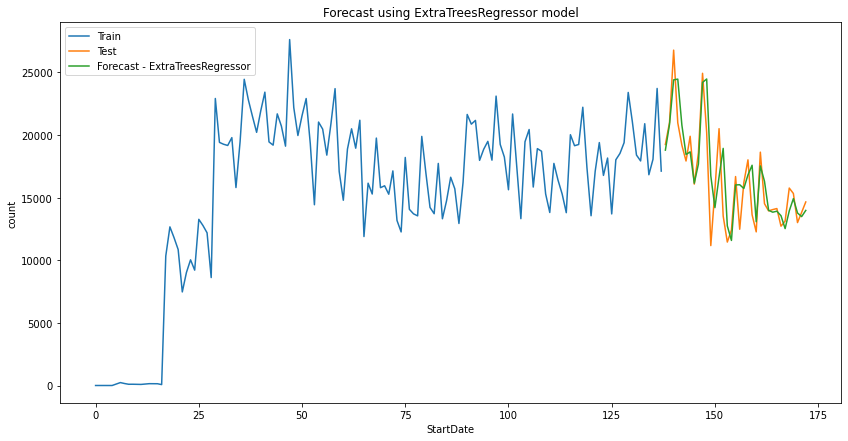

In [133]:
# Evaluate predictions for Extra Tree Regressor
fig = plt.figure(figsize=(14,7))
plt.plot(retail_train.index, retail_train['count'], label='Train')
plt.plot(retail_test.index, retail_test['count'], label='Test')
plt.plot(etr_errors_df.index, etr_errors_df['Predicted_Base'], label='Forecast - ExtraTreesRegressor')
plt.legend(loc='best')
plt.xlabel('StartDate')
plt.ylabel('count')
plt.title('Forecast using ExtraTreesRegressor model')
plt.show()

In [136]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [137]:
lr_preds = lr_model.predict(X_test)
print('Prediction is done..')

Prediction is done..


In [138]:
lr_errors_df = retail_test[['count']]
lr_errors_df['Predicted_Base'] = lr_preds
lr_errors_df['Error'] = lr_preds - y_test
lr_errors_df.insert(0, 'Modelname', 'Linear Regression')
lr_errors_df.head()

,Modelname,count,Predicted_Base,Error
138,Linear Regression,19251,17931.072700,-1319.927300
139,Linear Regression,21004,19705.060243,-1298.939757
140,Linear Regression,26785,24296.921678,-2488.078322
141,Linear Regression,20982,24291.663278,3309.663278
142,Linear Regression,19182,19672.687868,490.687868


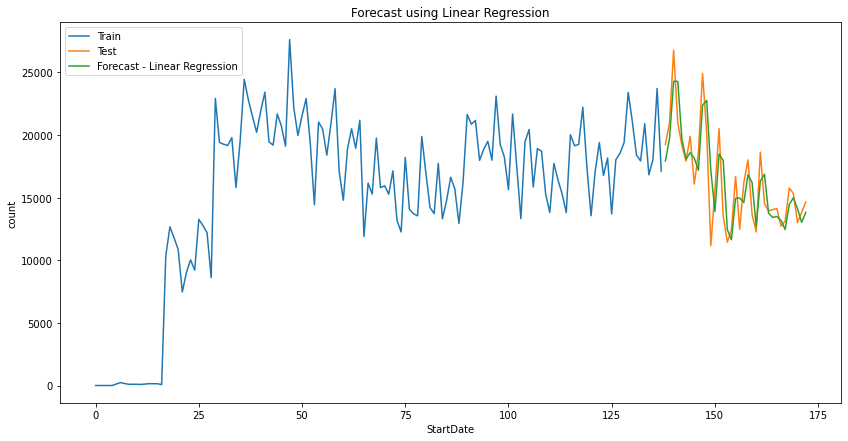

In [140]:
# Evaluate predictions for Linear Regression
fig = plt.figure(figsize=(14,7))
plt.plot(retail_train.index, retail_train['count'], label='Train')
plt.plot(retail_test.index, retail_test['count'], label='Test')
plt.plot(lr_errors_df.index, lr_errors_df['Predicted_Base'], label='Forecast - Linear Regression')
plt.legend(loc='best')
plt.xlabel('StartDate')
plt.ylabel('count')
plt.title('Forecast using Linear Regression')
plt.show()

In [143]:
arima_model = ARIMA(bal2['count'], (3,1,3)).fit(disp=False)
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  172
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1614.777
Method:                       css-mle   S.D. of innovations           2883.246
Date:                Wed, 18 May 2022   AIC                           3245.555
Time:                        12:24:47   BIC                           3270.735
Sample:                             1   HQIC                          3255.771
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            83.9007     91.061      0.921      0.357     -94.575     262.376
ar.L1.D.count    -1.0200      0.216     -4.722      0.000      -1.443      -0.597
ar.L2.D.count    -0.7932      0.135     

In [144]:
sarima_model = SARIMAX(bal2['count'], order=(3, 1, 3), seasonal_order=(6, 1, 0, 12), 
                       enforce_invertibility=False, enforce_stationarity=False)
sarima_fit = sarima_model.fit()
sarima_test_df = retail_test[["count"]]
sarima_test_df['Predicted_Base'] = sarima_fit.predict(start=retail_test.index[0],
                                                 end=retail_test.index[-1], dynamic= True)
plot = sarima_fit.plot_diagnostics(figsize=(14,7))
plot

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62655D+00    |proj g|=  1.58940D-01


 This problem is unconstrained.



At iterate    5    f=  4.58989D+00    |proj g|=  1.84345D-02

At iterate   10    f=  4.58305D+00    |proj g|=  3.08045D-02

At iterate   15    f=  4.57862D+00    |proj g|=  2.31382D-02

At iterate   20    f=  4.57737D+00    |proj g|=  1.03167D-02

At iterate   25    f=  4.57718D+00    |proj g|=  4.62788D-03

At iterate   30    f=  4.57690D+00    |proj g|=  2.96319D-02

At iterate   35    f=  4.57677D+00    |proj g|=  5.48850D-03

At iterate   40    f=  4.57661D+00    |proj g|=  8.53307D-03

At iterate   45    f=  4.57639D+00    |proj g|=  1.16478D-02

At iterate   50    f=  4.57618D+00    |proj g|=  3.35195D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1008x504 with 0 Axes>

In [147]:
# Evaluation
sarima_test_df['Error'] = sarima_test_df['count'] - sarima_test_df.Predicted_Base
sarima_test_df.insert(0, 'Modelname', 'SARIMA')
sarima_test_df.head()

,Modelname,count,Predicted_Base,Error
138,SARIMA,19251,17029.114125,2221.885875
139,SARIMA,21004,21172.989945,-168.989945
140,SARIMA,26785,23570.200626,3214.799374
141,SARIMA,20982,20159.786375,822.213625
142,SARIMA,19182,19087.109694,94.890306


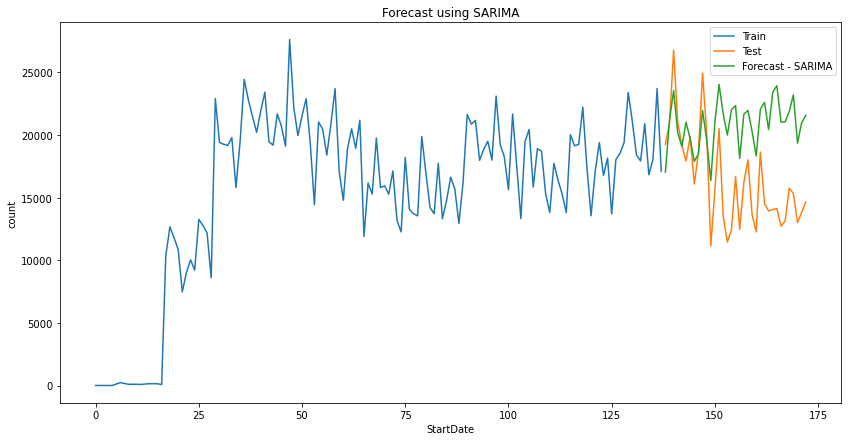

In [148]:
# Evaluate the predictions for Seasonal ARIMA model
fig = plt.figure(figsize=(14,7))
plt.plot(retail_train.index, retail_train['count'], label='Train')
plt.plot(retail_test.index, retail_test['count'], label='Test')
plt.plot(sarima_test_df.index, sarima_test_df['Predicted_Base'], label='Forecast - SARIMA')
plt.legend(loc='best')
plt.xlabel('StartDate')
plt.ylabel('count')
plt.title('Forecast using SARIMA')
plt.show()

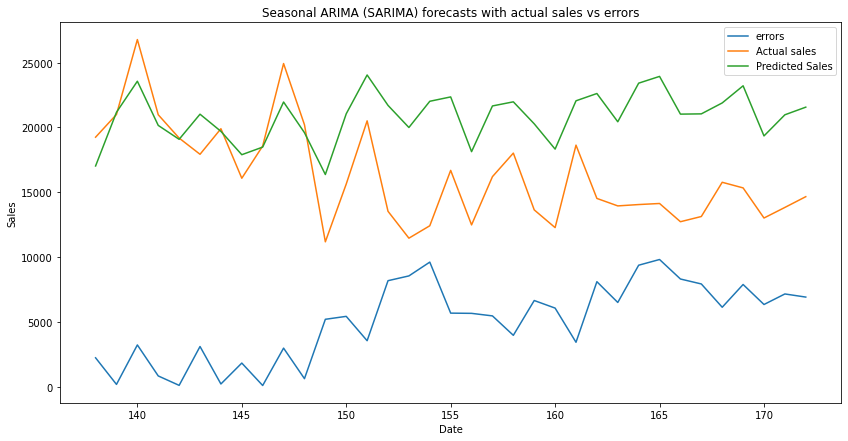

In [149]:
plt.figure(figsize=(14,7))
plt.plot(sarima_test_df.index, np.abs(sarima_test_df['Error']), label='errors')
plt.plot(sarima_test_df.index, sarima_test_df['count'], label='Actual sales')
plt.plot(sarima_test_df.index, sarima_test_df['Predicted_Base'], label='Predicted Sales')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Seasonal ARIMA (SARIMA) forecasts with actual sales vs errors')
plt.show()


In [152]:
import sklearn
svr_model = sklearn.svm.SVR(kernel='linear', degree=3, C=1.0,).fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
print('Prediction is done...')
# Errors calculation
svr_errors_df = retail_test[['count']]
svr_errors_df['Predicted_Base'] = svr_preds
svr_errors_df['Error'] = svr_preds - y_test
svr_errors_df.insert(0, 'Modelname', 'Support Vector Regressor')
svr_errors_df.head()

Prediction is done...


,Modelname,count,Predicted_Base,Error
138,Support Vector Regressor,19251,18702.160145,-548.839855
139,Support Vector Regressor,21004,20387.782401,-616.217599
140,Support Vector Regressor,26785,26107.701602,-677.298398
141,Support Vector Regressor,20982,26108.374874,5126.374874
142,Support Vector Regressor,19182,20367.922313,1185.922313


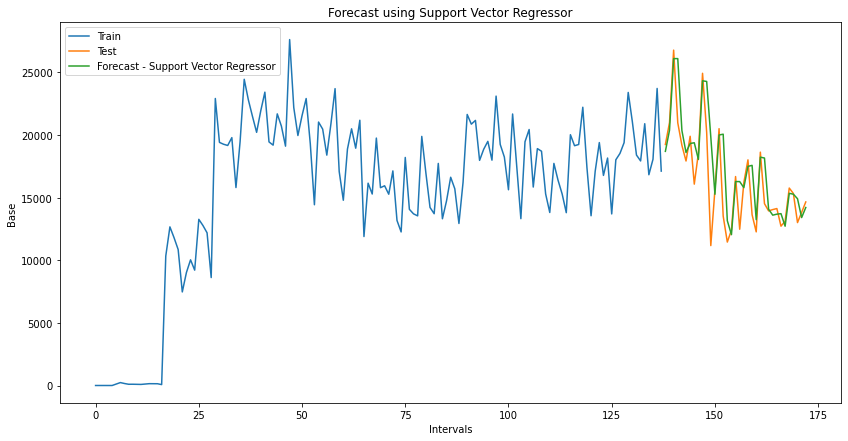

In [153]:
# Evaluate predictions for Support Vector Regressor
fig = plt.figure(figsize=(14,7))
plt.plot(retail_train.index, retail_train['count'], label='Train')
plt.plot(retail_test.index, retail_test['count'], label='Test')
plt.plot(svr_errors_df.index, svr_errors_df['Predicted_Base'], label='Forecast - Support Vector Regressor')
plt.legend(loc='best')
plt.xlabel('Intervals')
plt.ylabel('Base')
plt.title('Forecast using Support Vector Regressor')
plt.show()

In [155]:
result_df_svr = svr_errors_df.groupby('Modelname').agg(Total_Sales=('count', 'sum'),
                                          Total_Pred_Sales=('Predicted_Base', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_svr

,Total_Sales,Total_Pred_Sales,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Support Vector Regressor,572624,610183.910654,37559.910654,1594.609072,2562.755359,9.746591


In [156]:
result_df_sarima = sarima_test_df.groupby('Modelname').agg(Total_Sales=('count', 'sum'),
                                          Total_Pred_Sales=('Predicted_Base', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_sarima

,Total_Sales,Total_Pred_Sales,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
SARIMA,572624,729224.742022,-156600.742022,5058.430063,5863.588594,30.918203


In [157]:
result_df_hw = tes_errors_df.groupby('Modelname').agg(Total_Sales=('count', 'sum'),
                                          Total_Pred_Sales=('Predicted_Base', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_hw

,Total_Sales,Total_Pred_Sales,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Holtman- TES,572624,694668.143213,122044.143213,4823.849211,5708.928011,29.484395


In [158]:
result_df_lr = lr_errors_df.groupby('Modelname').agg(Total_Sales=('count', 'sum'),
                                          Total_Pred_Sales=('Predicted_Base', 'sum'),
                                          Model_Overall_Error=('Error', 'sum'),
                                          MAE=('Error', mae),
                                          RMSE=('Error', rmse), 
                                          MAPE=('Error', mape))
result_df_lr

,Total_Sales,Total_Pred_Sales,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Linear Regression,572624,574998.073168,2374.073168,1616.342434,2023.652828,9.87943


In [161]:
list_objs = [result_df_svr, result_df_lr, result_df_hw, result_df_sarima]
metrics_table = pd.concat(list_objs)
metrics_table

,Total_Sales,Total_Pred_Sales,Model_Overall_Error,MAE,RMSE,MAPE
Modelname,,,,,,
Support Vector Regressor,572624,610183.910654,37559.910654,1594.609072,2562.755359,9.746591
Linear Regression,572624,574998.073168,2374.073168,1616.342434,2023.652828,9.879430
Holtman- TES,572624,694668.143213,122044.143213,4823.849211,5708.928011,29.484395
SARIMA,572624,729224.742022,-156600.742022,5058.430063,5863.588594,30.918203


In [162]:
print('Model Score at Train set: {:.2%}'.format(etr_model.score(X_train, y_train)))
print('Model Score at Test set: {:.2%}'.format(etr_model.score(X_test, y_test)))

Model Score at Train set: 100.00%
Model Score at Test set: 66.15%
